In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# 1) Data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = (x_train.astype("float32") / 255.0).reshape(-1, 28*28)
x_test  = (x_test.astype("float32") / 255.0).reshape(-1, 28*28)

input_dim = 28*28

# 2) Encoder
inp = keras.Input(shape=(input_dim,))
h1 = layers.Dense(128, activation="relu")(inp)
h2 = layers.Dense(32, activation="relu")(h1)
z  = layers.Dense(3, activation=None, name="latent")(h2)   # latent 3D

encoder = keras.Model(inp, z, name="encoder")

# 3) Decoder
z_in = keras.Input(shape=(3,))
d1 = layers.Dense(32, activation="relu")(z_in)
d2 = layers.Dense(128, activation="relu")(d1)
out = layers.Dense(input_dim, activation="sigmoid")(d2)    # pixels in [0,1]

decoder = keras.Model(z_in, out, name="decoder")

# 4) Autoencoder
x_in = keras.Input(shape=(input_dim,))
x_rec = decoder(encoder(x_in))
autoencoder = keras.Model(x_in, x_rec, name="autoencoder")

autoencoder.compile(optimizer=keras.optimizers.Adam(1e-3),
                    loss="mse")

history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
    verbose=1
)

train_mse = autoencoder.evaluate(x_train, x_train, verbose=0)
test_mse  = autoencoder.evaluate(x_test, x_test, verbose=0)
print(f"Train MSE: {train_mse:.6f}")
print(f"Test  MSE: {test_mse:.6f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0997 - val_loss: 0.0519
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0500 - val_loss: 0.0455
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0449 - val_loss: 0.0424
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0422 - val_loss: 0.0406
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0405 - val_loss: 0.0395
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0394 - val_loss: 0.0388
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0386 - val_loss: 0.0380
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0378 - val_loss: 0.0375
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0372 - val_loss: 0.0369
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0367 - val_loss: 0.0364
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0362 - val_los

59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


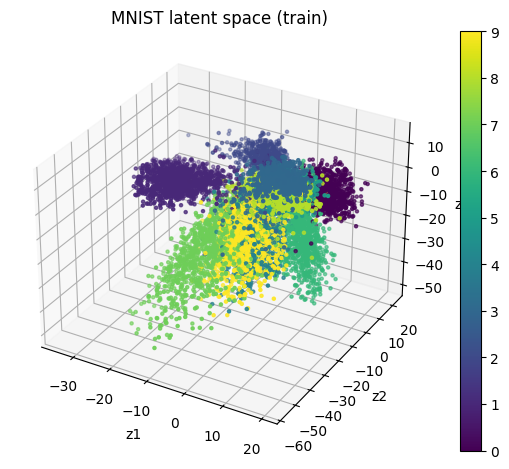

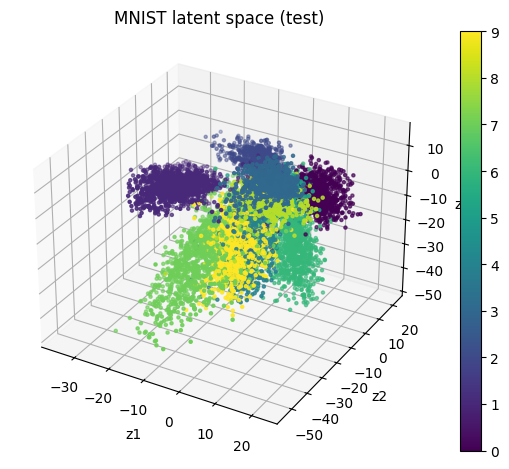

In [2]:
from mpl_toolkits.mplot3d import Axes3D  # noqa

# Encode train/test
z_train = encoder.predict(x_train, batch_size=1024)
z_test  = encoder.predict(x_test,  batch_size=1024)

def plot_latent_3d(Z, y, title, n=10000):
    # για να μη σκάσει το plot, δείξε υποσύνολο
    idx = np.random.choice(len(Z), size=min(n, len(Z)), replace=False)
    Zs, ys = Z[idx], y[idx]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(Zs[:,0], Zs[:,1], Zs[:,2], c=ys, s=5)
    plt.colorbar(sc)
    ax.set_title(title)
    ax.set_xlabel("z1"); ax.set_ylabel("z2"); ax.set_zlabel("z3")
    plt.tight_layout()
    plt.show()

plot_latent_3d(z_train, y_train, "MNIST latent space (train)")
plot_latent_3d(z_test,  y_test,  "MNIST latent space (test)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


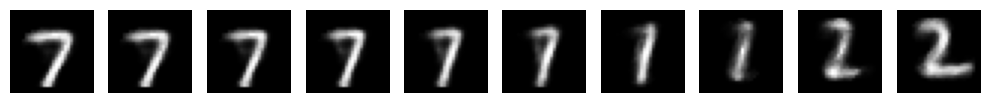

In [3]:
# Πάρε 2 πραγματικές εικόνες και κάνε παρεμβολή στο latent
a, b = 0, 1  # indices, άλλαξέ τα
za = z_test[a]
zb = z_test[b]

ts = np.linspace(0, 1, 10)
Z_path = np.array([(1-t)*za + t*zb for t in ts])

x_path = decoder.predict(Z_path).reshape(-1, 28, 28)

plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_path[i], cmap="gray")
    plt.axis("off")
plt.tight_layout()
plt.show()
